<a href="https://colab.research.google.com/github/Yashfa54/EDA-AICP-Internship/blob/main/EDA_Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import following libraries at start:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"

data = pd.read_csv("/content/Instagram data.csv", encoding='latin-1')

**Show column names and have a look at their info.**

In [ ]:
print(data.columns)
print(data.info())

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), objec

**Show the descriptive statistics of the data.**

In [ ]:
print(data.describe())

        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

**Check if your data contains any missing values**

In [ ]:
print(data.isnull().sum())

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


**When you start exploring your data, always start by exploring the main feature of your data. For
example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
feature that contains data about reach. In our data, the Impressions column contains the data about the
reach of an Instagram post. So let’s have a look at the distribution of the Impressions:**

In [ ]:
fig = px.histogram(data,
                   x='Impressions',
                   nbins=10,
                   title='Distribution of Impressions')
fig.show()


**Have a look at the number of impressions on each post over time as shown below**

In [ ]:
fig = px.line(data, x= data.index,
              y='Impressions',
              title='Impressions Over Time')
fig.show()

**Have a look at all the metrics like Likes, Saves, and Follows from each post over time as
shown below**

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Likes'], name='Likes'))
fig.add_trace(go.Scatter(x=data.index, y=data['Saves'], name='Saves'))
fig.add_trace(go.Scatter(x=data.index, y=data['Follows'], name='Follows'))

fig.update_layout(title='Metrics Over Time',
                  xaxis_title='Date',
                  yaxis_title='Count')

fig.show()

**Have a look at the distribution of reach from different sources as shown below**

In [ ]:
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

fig = px.pie(data_frame=data, names=reach_sources,
             values=reach_counts,
             title='Reach from Different Sources',
             color_discrete_sequence=colors)
fig.show()

**Have a look at the distribution of engagement sources as shown below**

In [ ]:
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

fig = px.pie(data_frame=data, names=engagement_metrics,
             values=engagement_counts,
             title='Engagement Sources',
             color_discrete_sequence=colors)
fig.show()


**Have a look at the relationship between the number of profile visits and follows as shown
below**

In [ ]:
fig = px.scatter(data,
                 x='Profile Visits',
                 y='Follows',
                 trendline = 'ols',
                 title='Profile Visits vs. Follows')
fig.show()

**Have a look at the type of hashtags used in the posts using a wordcloud as shown below**

In [ ]:
hashtags = ' '.join(data['Hashtags'].astype(str))
wordcloud = WordCloud().generate(hashtags)

fig = px.imshow(wordcloud, title='Hashtags Word Cloud')
fig.show()

**Have a look at the correlation between all the features as shown below**

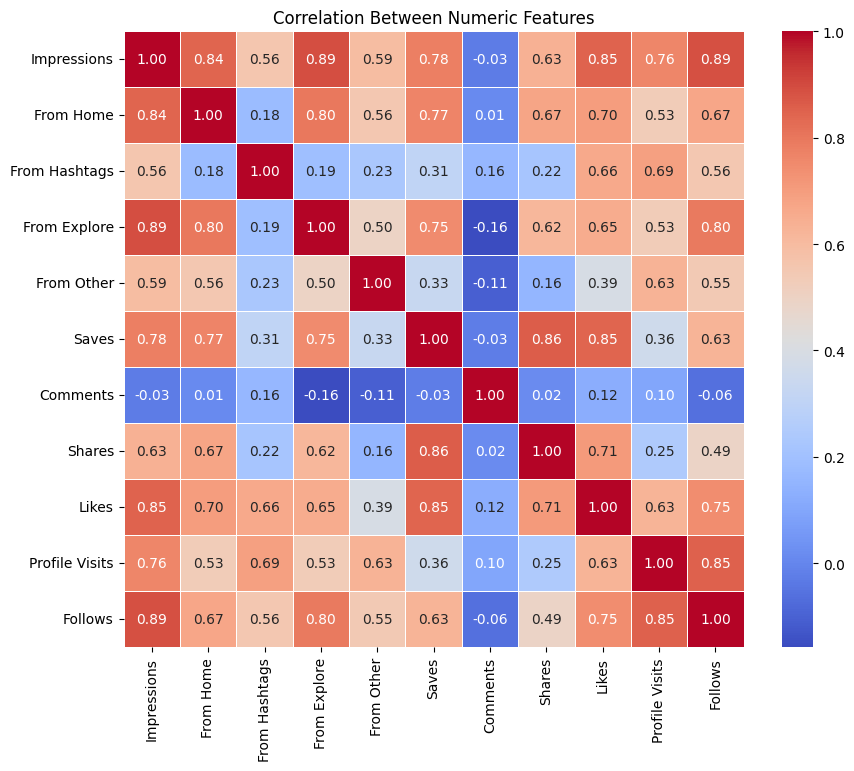

In [ ]:
numeric_df = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Numeric Features')
plt.show()

**Havea look at the distribution of hashtags to see which hashtag is used the most in all the
posts as shown below**

In [ ]:
all_hashtags = []

# Iterate through each row in the 'Hashtags' column
for row in data['Hashtags']:
    hashtags = str(row).split()
    hashtags = [tag.strip() for tag in hashtags]
    all_hashtags.extend(hashtags)

# Create a pandas DataFrame to store the hashtag distribution
hashtag_distribution = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_distribution.columns = ['Hashtag', 'Count']

fig = px.bar(hashtag_distribution, x='Hashtag',
             y='Count', title='Distribution of Hashtags')
fig.show()

**Have a look at the distribution of likes and impressions received from the presence of each
hashtag on the post as shown below**

In [ ]:
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row in the dataset
for index, row in data.iterrows():
    hashtags = str(row['Hashtags']).split()
    for hashtag in hashtags:
        hashtag = hashtag.strip()
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']
        hashtag_impressions[hashtag] += row['Impressions']
        likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

fig_likes = px.bar(likes_distribution, x='Hashtag', y='Likes',
                   title='Likes Distribution for Each Hashtag')

fig_impressions = px.bar(impressions_distribution, x='Hashtag',
                         y='Impressions',
                         title='Impressions Distribution for Each Hashtag')

fig_likes.show()
fig_impressions.show()


**Write summary as per your observation**

**The dataset provides insights into Instagram engagement metrics, including hashtags, impressions, likes, saves, and follows. It offers a comprehensive view of user interactions and content performance, enabling analysis of hashtag trends, post reach, engagement levels, and audience behavior. This valuable information can inform social media marketing strategies, content optimization efforts, and audience targeting for enhanced user engagement and brand visibility on Instagram.**
